### 相位响应
#### MATLAB® 函数可用于提取滤波器的相位响应。在给定频率响应的情况下，函数 abs 返回幅值，angle 返回以弧度为单位的相位角。要使用 fvtool 查看 Butterworth 滤波器的幅值和相位，请使用：

In [270]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np             

In [271]:
b, a = signal.iirfilter(9, Wn = 400,btype='lowpass', analog=True, ftype='butter', output='ba')
w, h = signal.freqs(b, a,worN=np.linspace(0,1000,10000))    

Text(0, 0.5, 'Phase(radians)')

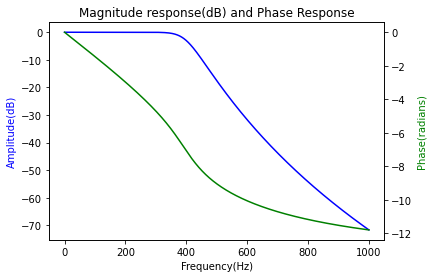

In [272]:
fig, ax1 = plt.subplots()
ax1.set_title('Magnitude response(dB) and Phase Response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude(dB)', color='b')
ax1.set_xlabel('Frequency(Hz)')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Phase(radians)', color='g')

#### 您也可以点击工具栏上的幅值和相位响应按钮，或选择分析 > 幅值和相位响应显示绘图。

#### unwrap 函数在频率分析中也很有用。unwrap 根据需要对相位增减若干个 360° 以将其展开，使之在 360° 相位不连续点处保持连续。要了解 unwrap 的作用，请设计一个 25 阶低通 FIR 滤波器：

In [273]:
h = signal.firwin(25, 0.4)

#### 用 freqz 获得频率响应，并以度为单位绘制相位：

Text(0, 0.5, 'Phase(radians)')

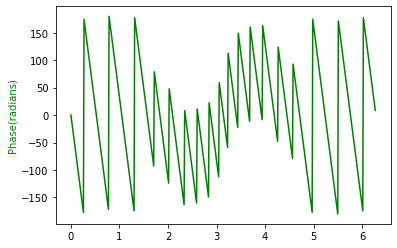

In [274]:
f,H = signal.freqz(h,1,512,2)
angles = np.angle(H)
fig, ax3 = plt.subplots()
ax3.plot(f, angles*180/np.pi, 'g')
ax3.set_ylabel('Phase(radians)', color='g')

#### 很难将 360° 跳跃（由 angle 中反正切函数的定义导致）与 180° 跳跃（表示频率响应为零）区分开来。

#### unwrap 消除了 360° 跳跃：

(0.0, 3.0)

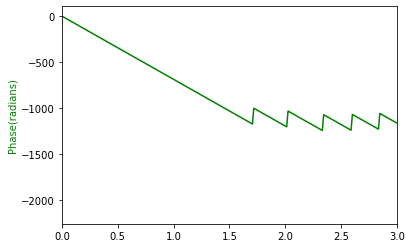

In [275]:
fig, ax4 = plt.subplots()
ax4.plot(f, np.unwrap(angles)*180/np.pi, 'g')
ax4.set_ylabel('Phase(radians)', color='g')
ax4.set_xlim([0, 3])